In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Read in this SNP genotype data obtained from the 1000 Genomes Project

In [2]:
df = pd.read_csv("matrix_1kg.txt", sep = "\t")
df

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Calculate the number of the sample

In [3]:
df.iloc[:, 4:].shape 

(10000, 2548)

## Calculate the total number of SNP Counts for each position 

In [4]:
df_sum = df.iloc[:,3:].sum(axis = 1)
df_sum

0         2
1        98
2        17
3        11
4         2
       ... 
9995    105
9996      1
9997      7
9998    147
9999     13
Length: 10000, dtype: int64

## Calculate the "alternate allele frequency" for each SNP. 

In [5]:
alt_allele_feq = df_sum / (2548*2)

## Plot the allele frequency spectrum (a histogram of the allele frequencies across SNPs).

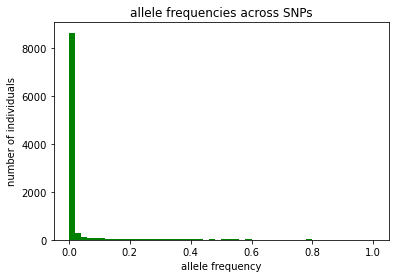

In [6]:
alt_allele_feq = df_sum / (2548*2)
fig, ax = plt.subplots()
ax.hist(alt_allele_feq, color = "green", bins=50)
ax.set_title("allele frequencies across SNPs")
ax.set_xlabel("allele frequency")
ax.set_ylabel("number of individuals")
plt.show()

In [7]:
alt_allele_feq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

In [8]:
# Add the alternate allele frequences as a separate column into the dataframe

In [9]:
df["alt allele freq"] = alt_allele_feq
df

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,alt allele freq
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000392
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.019231
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.003336
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.002159
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.020604
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000196
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001374
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.028846


## Subset the data frame to "common variation", where the alternate allele frequency is between 0.05 and 0.95

In [10]:
roi = (df.loc[:, "alt allele freq"] <=0.95) & (df.loc[:, "alt allele freq"] >= 0.05)
roi

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: alt allele freq, Length: 10000, dtype: bool

In [11]:
# labels = df[roi].loc[:,"REF"]
# labels

In [12]:
# Extract the columns with the inidvidual ID

In [13]:
df_2 = df[roi].iloc[:, 4:-1]
df_2

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,2,2,1,2
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9975,2,1,0,1,0,1,0,1,2,2,...,1,2,2,2,2,1,2,2,2,2


In [14]:
df_2 = df_2.T
df_2

,20,32,38,41,46,54,66,77,93,98,...,9894,9904,9913,9927,9929,9957,9959,9974,9975,9980
HG00096,0,1,0,0,0,0,0,1,0,2,...,0,0,0,0,2,1,1,0,2,0
HG00097,1,2,1,1,0,1,0,0,0,1,...,0,0,0,1,0,2,0,1,1,0
HG00099,1,1,2,0,0,1,0,1,0,2,...,0,1,1,0,1,2,1,1,0,0
HG00100,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,2,0,0,1,0
HG00101,0,1,1,0,0,2,1,0,0,0,...,0,0,1,0,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,1,1,0
NA21141,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,2,2,0,1,2,0
NA21142,0,1,2,0,0,0,0,0,0,2,...,0,0,1,1,0,2,0,0,2,0
NA21143,0,1,0,0,0,2,1,1,0,0,...,0,1,0,1,1,1,0,0,2,0


In [15]:
# Standardize the data for a mean of ~0 and variance of 1

In [16]:
pca_input_standardized = StandardScaler().fit_transform(df_2)

## Search for the top ten principal components

In [17]:
pca_2 = PCA(n_components = 10)
pca_output = pca_2.fit_transform(pca_input_standardized)
pca_output

array([[-6.14493037, -9.81856662, -1.54663331, ..., -0.06166566,
        -4.78066588,  1.8154912 ],
       [-6.13388414, -8.63182914,  2.55698229, ...,  5.29180806,
        -0.80768948, -1.40555504],
       [-6.23847319, -7.9718699 , -0.7464974 , ..., -2.38530001,
         0.66467529,  0.19497836],
       ...,
       [-4.09694721, -2.82736155, -4.18016207, ..., -0.0894413 ,
         4.43848092, -1.62067685],
       [-6.26346243, -2.58507986, -4.22575251, ..., -0.5434321 ,
         1.86353465,  0.01206702],
       [-3.17677867, -0.91694962, -6.45187734, ...,  3.43407786,
         1.64434606, -1.64616035]])

In [18]:
# for i in range (0, 2548):
#     df_2.index[i] = df_2.index[0:1]
# type(df_2.index)

In [19]:
type(df_2.index)

pandas.core.indexes.base.Index

## Give the output dataframe a revised column header

In [20]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df["sample"] = df_2.index
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample
0,-6.144930,-9.818567,-1.546633,-5.396454,-0.520384,-0.109602,0.880770,-0.061666,-4.780666,1.815491,HG00096
1,-6.133884,-8.631829,2.556982,-3.894441,0.322189,-2.259773,-1.098814,5.291808,-0.807689,-1.405555,HG00097
2,-6.238473,-7.971870,-0.746497,-4.013097,-0.930302,4.000379,0.685665,-2.385300,0.664675,0.194978,HG00099
3,-5.051218,-7.008727,2.805215,-4.759439,4.367657,0.195058,0.511985,-1.610966,1.609600,0.514807,HG00100
4,-6.634383,-8.543670,3.071519,-1.594732,-4.352192,0.816396,1.996561,-3.760821,0.957420,-0.901051,HG00101
...,...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.665178,3.299211,-0.199183,-0.720980,-2.809560,-0.712333,-1.159312,-2.006981,NA21137
2544,-6.295888,-3.116492,-5.555604,3.333800,3.344046,3.602001,0.376928,-3.575439,-1.295792,-3.419615,NA21141
2545,-4.096947,-2.827362,-4.180162,3.694795,1.551217,0.370650,-1.757968,-0.089441,4.438481,-1.620677,NA21142
2546,-6.263462,-2.585080,-4.225753,3.893318,-3.926720,-1.793899,-0.407643,-0.543432,1.863535,0.012067,NA21143


## Scatterplot using PC1 and PC2

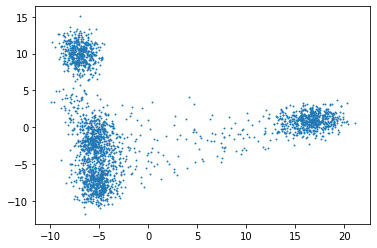

In [21]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'], s = 0.8)
plt.show()

## Load in the metadata

In [22]:
metadata = pd.read_csv("integrated_call_samples_v3.20130502.ALL.panel", sep = "\t")
metadata = metadata.iloc[:, 0:4]
metadata

,sample,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male
...,...,...,...,...
2499,NA21137,GIH,SAS,female
2500,NA21141,GIH,SAS,female
2501,NA21142,GIH,SAS,female
2502,NA21143,GIH,SAS,female


## Merge the information on the preexisting dataframe

In [23]:
pca_output_df_2 = pd.merge(pca_output_df, metadata, on = "sample")
pca_output_df_2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample,pop,super_pop,gender
0,-6.144930,-9.818567,-1.546633,-5.396454,-0.520384,-0.109602,0.880770,-0.061666,-4.780666,1.815491,HG00096,GBR,EUR,male
1,-6.133884,-8.631829,2.556982,-3.894441,0.322189,-2.259773,-1.098814,5.291808,-0.807689,-1.405555,HG00097,GBR,EUR,female
2,-6.238473,-7.971870,-0.746497,-4.013097,-0.930302,4.000379,0.685665,-2.385300,0.664675,0.194978,HG00099,GBR,EUR,female
3,-5.051218,-7.008727,2.805215,-4.759439,4.367657,0.195058,0.511985,-1.610966,1.609600,0.514807,HG00100,GBR,EUR,female
4,-6.634383,-8.543670,3.071519,-1.594732,-4.352192,0.816396,1.996561,-3.760821,0.957420,-0.901051,HG00101,GBR,EUR,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,-6.304582,-0.169819,-2.665178,3.299211,-0.199183,-0.720980,-2.809560,-0.712333,-1.159312,-2.006981,NA21137,GIH,SAS,female
2499,-6.295888,-3.116492,-5.555604,3.333800,3.344046,3.602001,0.376928,-3.575439,-1.295792,-3.419615,NA21141,GIH,SAS,female
2500,-4.096947,-2.827362,-4.180162,3.694795,1.551217,0.370650,-1.757968,-0.089441,4.438481,-1.620677,NA21142,GIH,SAS,female
2501,-6.263462,-2.585080,-4.225753,3.893318,-3.926720,-1.793899,-0.407643,-0.543432,1.863535,0.012067,NA21143,GIH,SAS,female


## Color the PCA plot according to population, superpopulation, and sex 

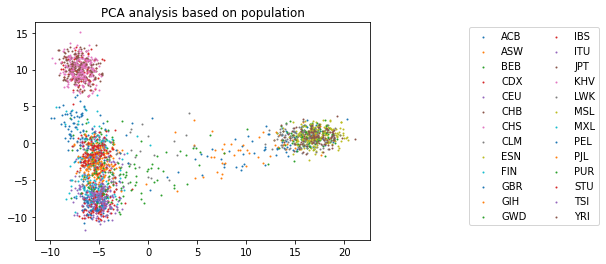

In [24]:
fig, ax = plt.subplots()
typ = pca_output_df_2.groupby("pop")
for name, group in typ:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name, s = 1)
ax.set_title("PCA analysis based on population")    
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)
plt.show()

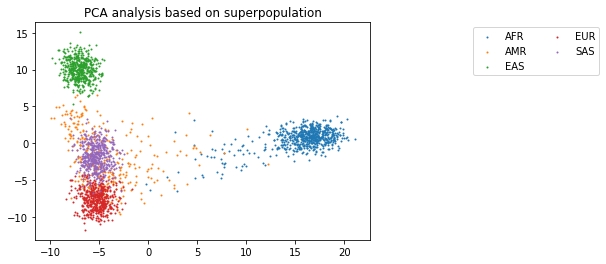

In [25]:
fig, ax = plt.subplots()
typ_2 = pca_output_df_2.groupby("super_pop")
for name, group in typ_2:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name, s=1)
ax.set_title("PCA analysis based on superpopulation")     
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)
plt.show()

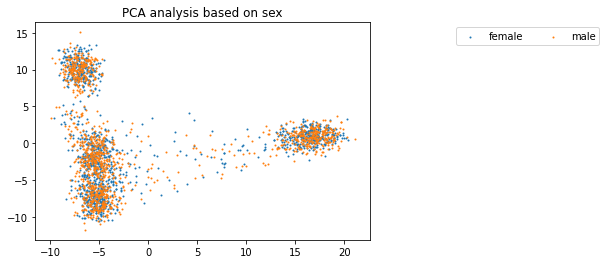

In [26]:
fig, ax = plt.subplots()
typ_3 = pca_output_df_2.groupby("gender")
for name, group in typ_3:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name, s = 1)
ax.set_title("PCA analysis based on sex")     
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)
plt.show()

In [27]:
from mpl_toolkits.mplot3d import Axes3D

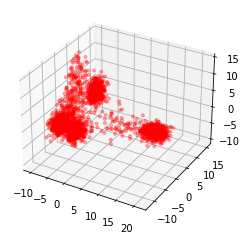

In [28]:
x = pca_output_df_2.loc[:,'PC1']
y = pca_output_df_2.loc[:,'PC2']
z= pca_output_df_2.loc[:,'PC3']
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, s=9, color = "red", alpha = 0.3)
plt.show()

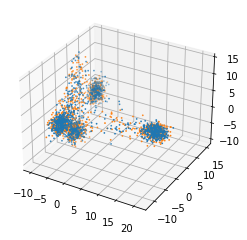

In [33]:
# x = pca_output_df_2.loc[:,'PC1']
# y = pca_output_df_2.loc[:,'PC2']
# z= pca_output_df_2.loc[:,'PC3']
ax = plt.axes(projection='3d')
typ_4 = pca_output_df_2.groupby("gender")
for name, group in typ_4:
    ax.scatter3D(xs = group['PC1'], ys = group['PC2'], zs=group['PC3'], label = name, s=0.6)
plt.show()